# Variable Preselection

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE
from xgboost import XGBRegressor
from sklearn.inspection import permutation_importance

%config IPCompleter.greedy=True

In [2]:
df = pd.read_pickle('../../02_Data/03_Work/df_board.pickle')


In [3]:
df

,date,store_id,item_id,year_2013,year_2014,year_2015,month_1,month_2,month_3,month_4,...,sales_maxlocal_6,sales_maxlocal_7,sales_maxlocal_8,sales_maxlocal_9,sales_maxlocal_10,sales_maxlocal_11,sales_maxlocal_12,sales_maxlocal_13,sales_maxlocal_14,sales_maxlocal_15
0,2013-01-16,CA_3,FOODS_3_090,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0
1,2013-01-17,CA_3,FOODS_3_090,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0
2,2013-01-18,CA_3,FOODS_3_090,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0
3,2013-01-19,CA_3,FOODS_3_090,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,281.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0
4,2013-01-20,CA_3,FOODS_3_090,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,362.0,362.0,362.0,362.0,362.0,362.0,362.0,362.0,362.0,362.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20975,2015-11-26,CA_4,FOODS_3_714,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,15.0,15.0,15.0,15.0,15.0,17.0,17.0,17.0,17.0,17.0
20976,2015-11-27,CA_4,FOODS_3_714,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0
20977,2015-11-28,CA_4,FOODS_3_714,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0
20978,2015-11-29,CA_4,FOODS_3_714,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0


## Supervised methods

In [4]:
x = df.drop(columns = ['date','store_id','item_id','sales']).copy()
y =  df.sales.copy()

### Mutual Information

In [7]:
def ranking_mi(mutual_selector, mode = 'table'):
    #ranking
    ranking_mi = pd.DataFrame(mutual_selector, index = x.columns).reset_index()
    ranking_mi.columns = ['variable','importance_mi']
    ranking_mi = ranking_mi.sort_values(by = 'importance_mi', ascending = False)
    ranking_mi['ranking_mi'] = np.arange(0,ranking_mi.shape[0])
    #output
    if mode == 'table':
        return(ranking_mi)
    else:
        g = ranking_mi.importance_mi.sort_values().plot.barh(figsize = (12,20))
        g.set_yticklabels(ranking_mi.sort_values(by = 'importance_mi').variable)
        return(g)

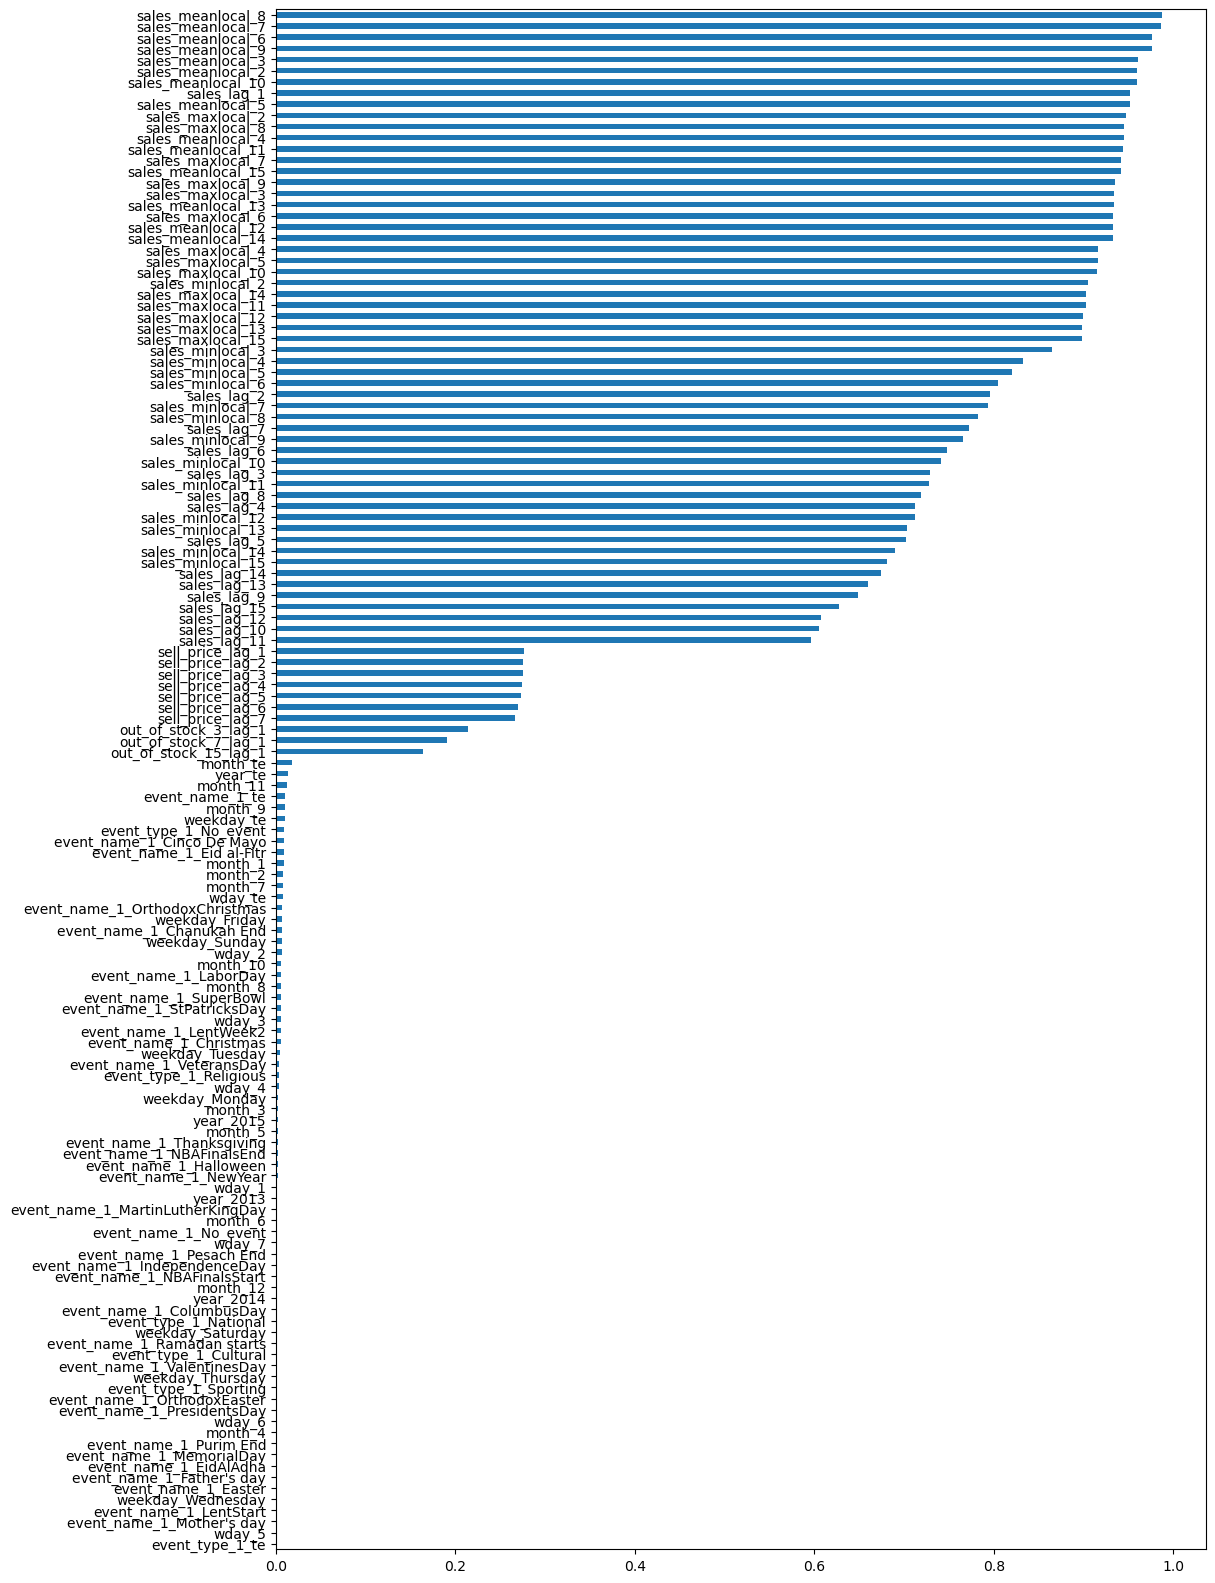

In [9]:
mutual_selector = mutual_info_regression(x,y)

rank_mi = ranking_mi(mutual_selector, mode = 'graph')

In [10]:
# check the position of month_9
ranking_mi(mutual_selector).reset_index().iloc[60:100]

,index,variable,importance_mi,ranking_mi
60,74,sell_price_lag_4,0.274097,60
61,75,sell_price_lag_5,0.273433,61
62,76,sell_price_lag_6,0.269637,62
63,77,sell_price_lag_7,0.266112,63
64,78,out_of_stock_3_lag_1,0.213788,64
65,79,out_of_stock_7_lag_1,0.190644,65
66,80,out_of_stock_15_lag_1,0.164348,66
67,66,month_te,0.018157,67
68,65,year_te,0.013694,68
69,13,month_11,0.012698,69


In [11]:
limit_var_position = 71
enter_mi = ranking_mi(mutual_selector).iloc[0:limit_var_position].variable

x_mi = x[enter_mi].copy()

### Recursive Feature Elimination

In [13]:

rfe = RFE(estimator = XGBRegressor(use_label_encoder=False, n_jobs = -1, eval_metric='mae'))


In [14]:
rfe.fit(x,y)

RFE(estimator=XGBRegressor(base_score=None, booster=None, callbacks=None,
                           colsample_bylevel=None, colsample_bynode=None,
                           colsample_bytree=None, device=None,
                           early_stopping_rounds=None, enable_categorical=False,
                           eval_metric='mae', feature_types=None, gamma=None,
                           grow_policy=None, importance_type=None,
                           interaction_constraints=None, learning_rate=None,
                           max_bin=None, max_cat_threshold=None,
                           max_cat_to_onehot=None, max_delta_step=None,
                           max_depth=None, max_leaves=None,
                           min_child_weight=None, missing=nan,
                           monotone_constraints=None, multi_strategy=None,
                           n_estimators=None, n_jobs=-1, num_parallel_tree=None,
                           random_state=None, ...))

In [15]:
enter_rfe = x.columns[rfe.support_]
x_rfe = x[enter_rfe].copy()

In [17]:
x_rfe.head(2)

,year_2013,month_3,month_11,month_12,wday_1,wday_2,event_name_1_Christmas,event_name_1_Thanksgiving,event_name_1_VeteransDay,wday_te,...,sales_maxlocal_4,sales_maxlocal_5,sales_maxlocal_6,sales_maxlocal_7,sales_maxlocal_8,sales_maxlocal_9,sales_maxlocal_10,sales_maxlocal_11,sales_maxlocal_13,sales_maxlocal_15
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.894333,...,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.096333,...,281.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0


### Permutation Importance

In [18]:
def ranking_per(predictors,permutation):
    ranking_per = pd.DataFrame({'variable': predictors.columns, 'importance_per': permutation.importances_mean}).sort_values(by = 'importance_per', ascending = False)
    ranking_per['ranking_per'] = np.arange(0,ranking_per.shape[0])
    return(ranking_per)


In [23]:
import warnings
warnings.filterwarnings(action="ignore", message=r'.*Use subset.*of np.ndarray is not recommended')

xgb = XGBRegressor(n_jobs = -1, eval_metric='mae')

xgb.fit(x,y)

permutation = permutation_importance(xgb, 
                                     x, y, 
                                     scoring = 'neg_mean_absolute_percentage_error',
                                     n_repeats=3, n_jobs = -1)

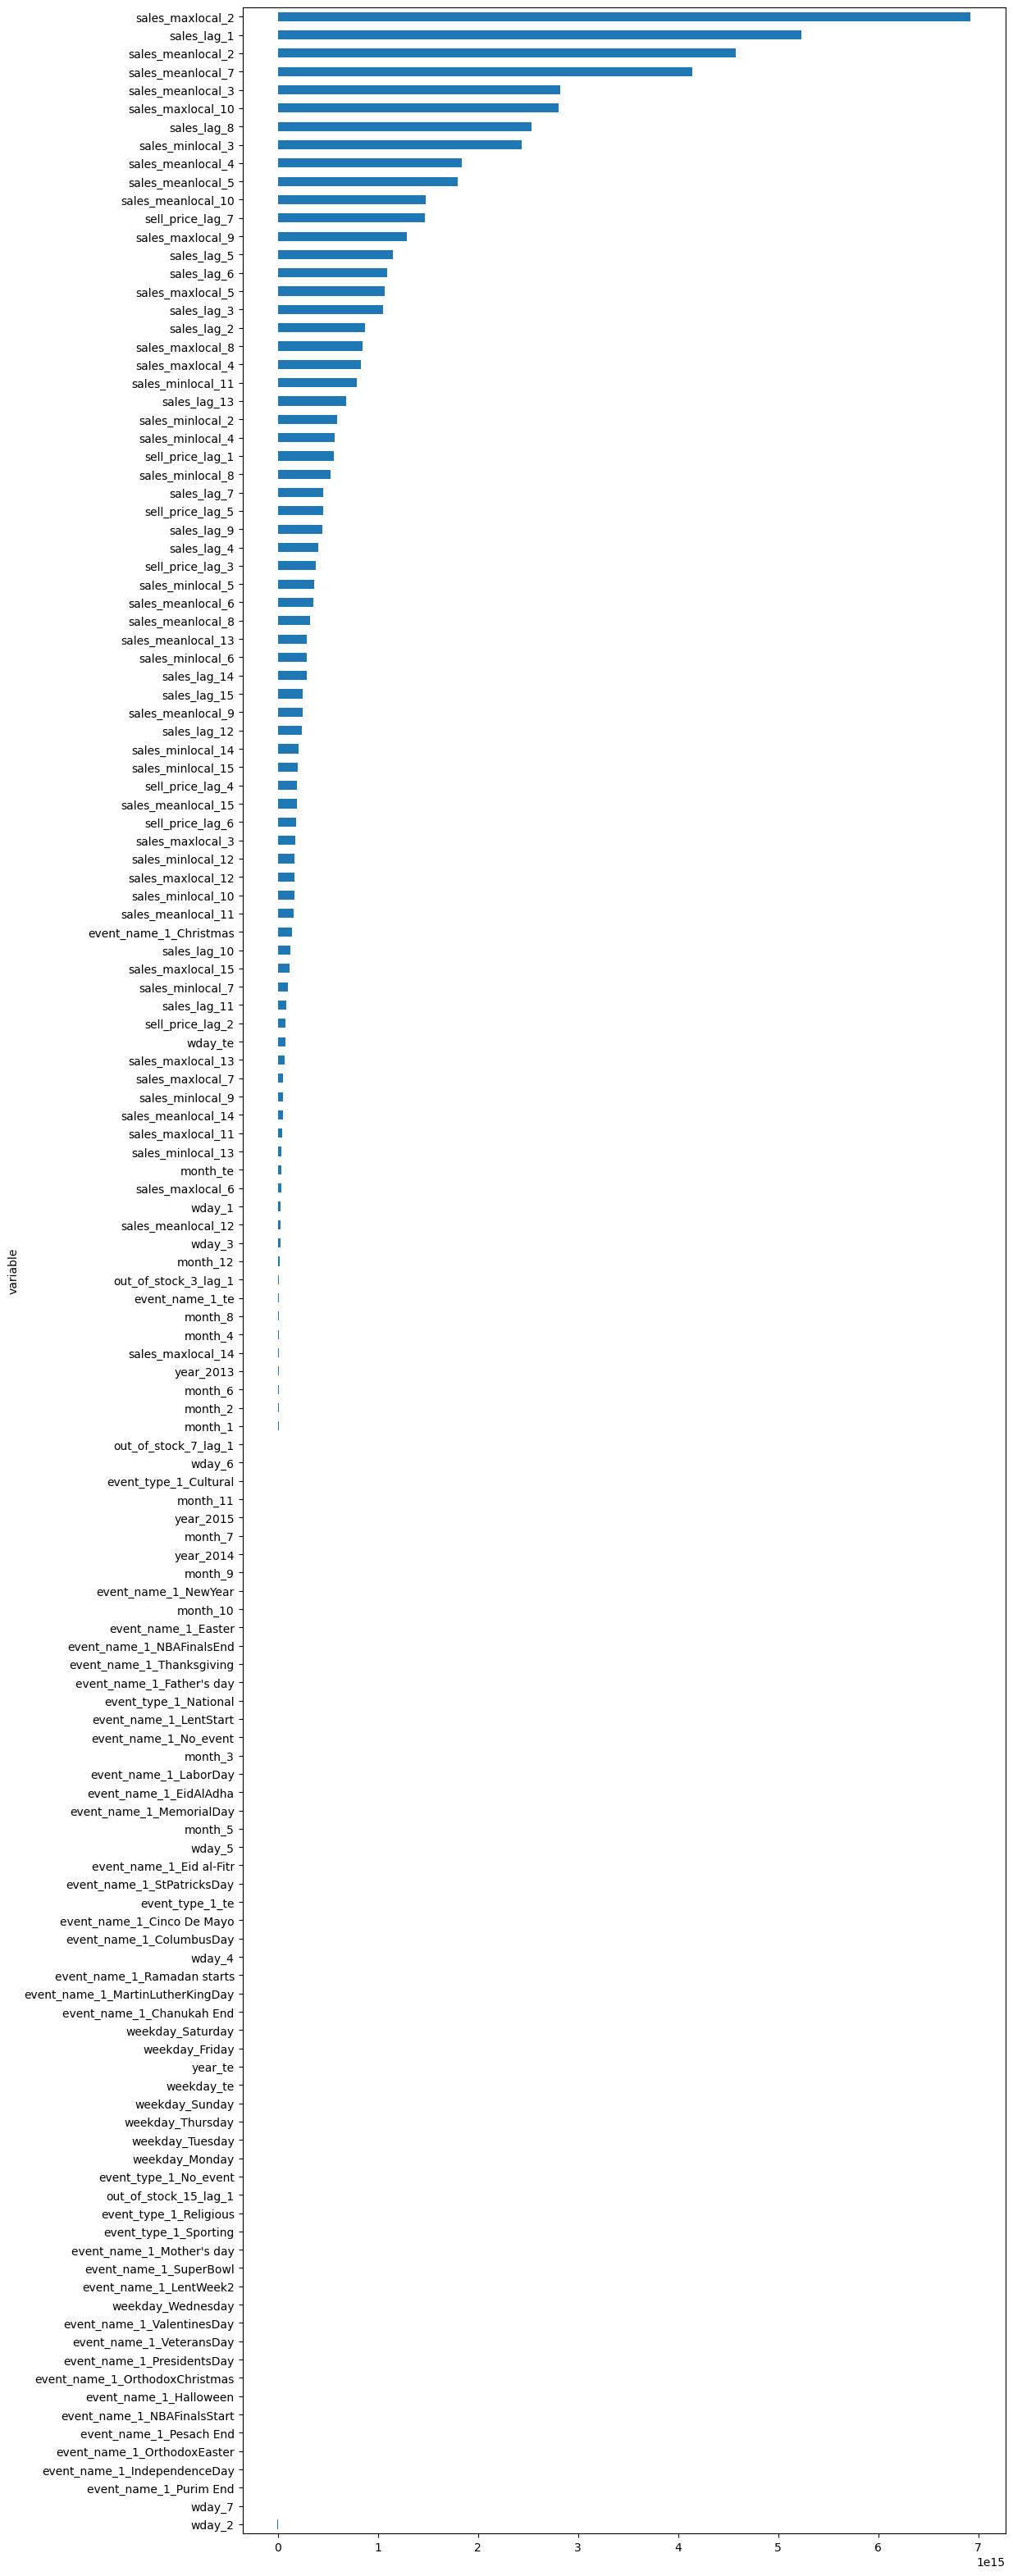

In [25]:
rank_per = ranking_per(x,permutation)

rank_per.set_index('variable').importance_per.sort_values().plot.barh(figsize = (12,40));

In [26]:
# search to cut in month_te
rank_per.reset_index().iloc[50:100]

,index,variable,importance_per,ranking_per
50,30,event_name_1_Christmas,1.421874e+14,50
51,90,sales_lag_10,1.255038e+14,51
52,137,sales_maxlocal_15,1.200223e+14,52
53,101,sales_minlocal_7,1.015322e+14,53
54,91,sales_lag_11,8.816181e+13,54
55,72,sell_price_lag_2,7.739953e+13,55
56,67,wday_te,7.307260e+13,56
57,135,sales_maxlocal_13,6.647809e+13,57
58,129,sales_maxlocal_7,5.145823e+13,58
59,103,sales_minlocal_9,4.972945e+13,59


In [27]:
limit_var_position_pi = 63
enter_per = rank_per.iloc[0:limit_var_position_pi].variable

x_per = x[enter_per].copy()

#### Choose a final method

In [29]:
x_preselected = x_mi

### Add segmentation variables again

In [31]:

x_preselected = pd.concat([df[['date','store_id','item_id']], x_preselected], axis=1)


## Save datasets after preselection

In [33]:

x_preselected.to_pickle('../../02_Data/03_Work/x_preselected.pickle')
y.to_pickle('../../02_Data/03_Work/y_preselected.pickle')


In [34]:
# save final variables names

x_preselected.iloc[0].to_pickle('../../05_Results/final_variables.pickle')

